### Analiza i Przetwarzanie Dźwięku
**Projekt 1** - Szymon Gut, Jan Krężel

In [1]:
%load_ext autoreload
%autoreload 2

In [66]:
from src.recording import *
from src.plots import *

**Wczytanie plików**

In [20]:
# muzyka
africa = Recording("recordings/africa_toto.wav")
cantina = Recording("recordings/cantina_band.wav")
panther = Recording("recordings/pink_panther.wav")
starwars = Recording("recordings/starwars.wav")

# mowa
female = Recording("recordings/female.wav")
male = Recording("recordings/male.wav")
gettysburg = Recording("recordings/gettysburg.wav")
sentence = Recording("recordings/zdanie_1.wav")
harvard = Recording("recordings/harvard.wav")
harvard_denoised = Recording("recordings/harvard_denoised.wav")

**Podsumowanie najważniejszych informacji o kilku wybranych klipach audio**

In [43]:
print(starwars)


Audio Clip Summary
Name:       starwars

Duration:   60.00
Frequency:  22050
Samples:    1323000
Channels:   1

Detailed Metrics
Silent Ratio:   0.01
VDR:            1.00
LSTER:          0.10
HZCRR:          0.05
        


In [45]:
print(panther)


Audio Clip Summary
Name:       pink_panther

Duration:   30.00
Frequency:  22050
Samples:    661500
Channels:   1

Detailed Metrics
Silent Ratio:   0.03
VDR:            1.00
LSTER:          0.19
HZCRR:          0.07
        


In [25]:
print(sentence)


Audio Clip Summary
Name:       zdanie_1

Duration:   3.00
Frequency:  22050
Samples:    66121
Channels:   1

Detailed Metrics
Silent Ratio:   0.16
VDR:            0.99
LSTER:          0.48
HZCRR:          0.16
        


In [27]:
print(harvard_denoised)


Audio Clip Summary
Name:       harvard_denoised

Duration:   32.54
Frequency:  8000
Samples:    260343
Channels:   1

Detailed Metrics
Silent Ratio:   0.26
VDR:            1.00
LSTER:          0.48
HZCRR:          0.19
        


### Analiza klipów audio w dziedzinie czasu

**Wykresy Amplitudy dla wybranych klipów**

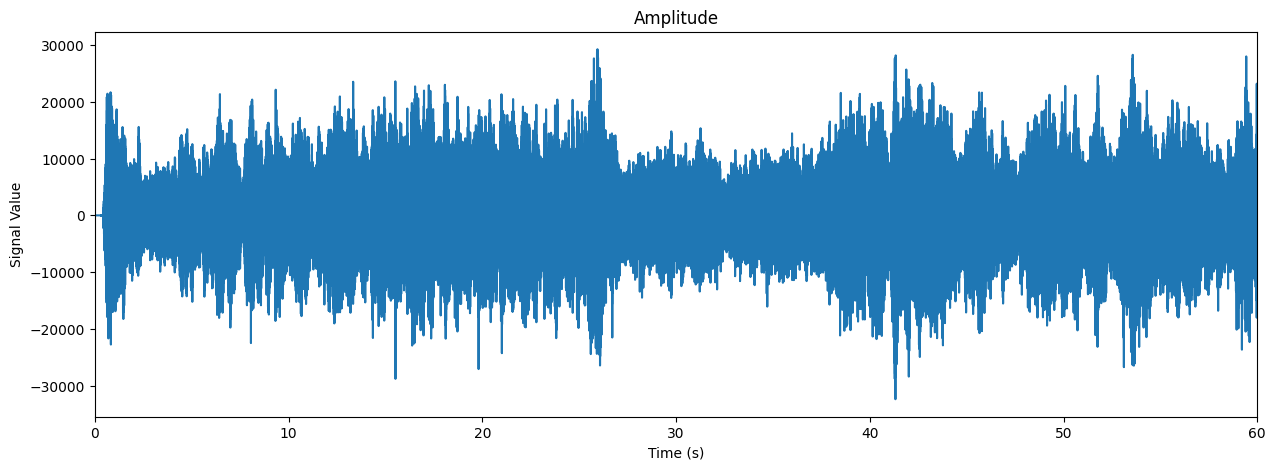

<Figure size 1500x500 with 0 Axes>

In [34]:
plt.figure(figsize=(15, 5))
plot_amplitude(starwars)

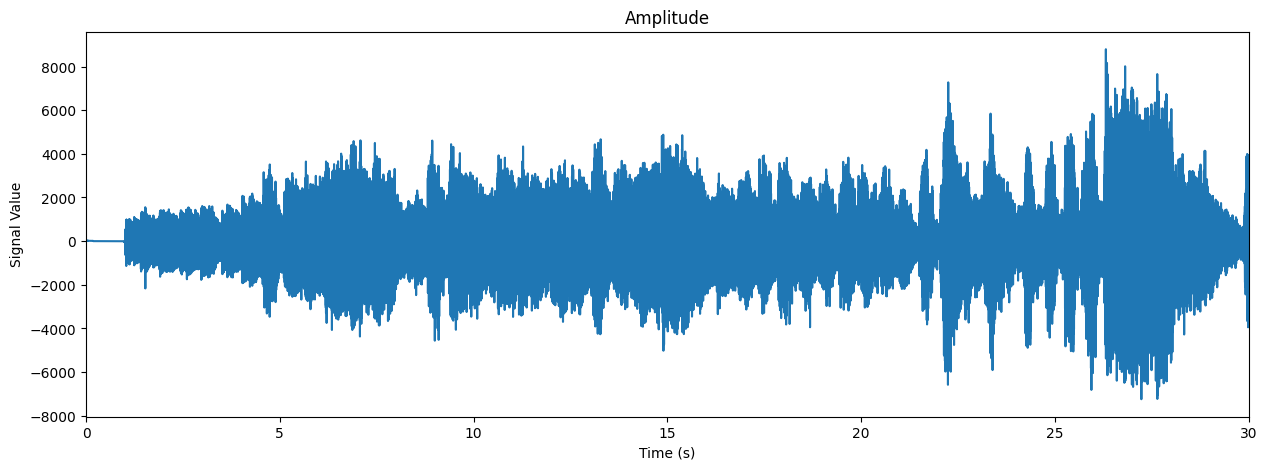

<Figure size 1500x500 with 0 Axes>

In [46]:
plt.figure(figsize=(15, 5))
plot_amplitude(panther)

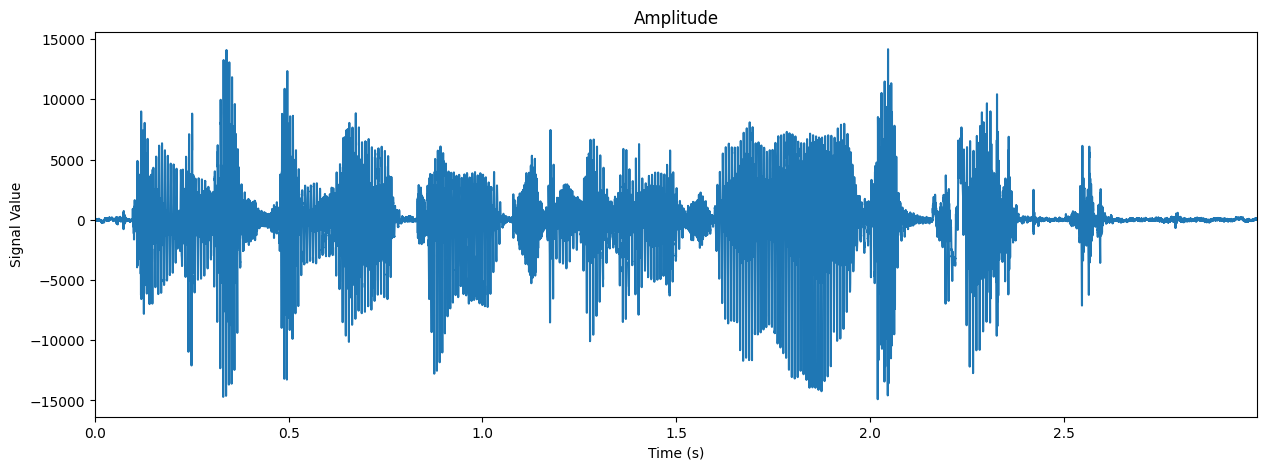

<Figure size 1500x500 with 0 Axes>

In [36]:
plt.figure(figsize=(15, 5))
plot_amplitude(sentence)

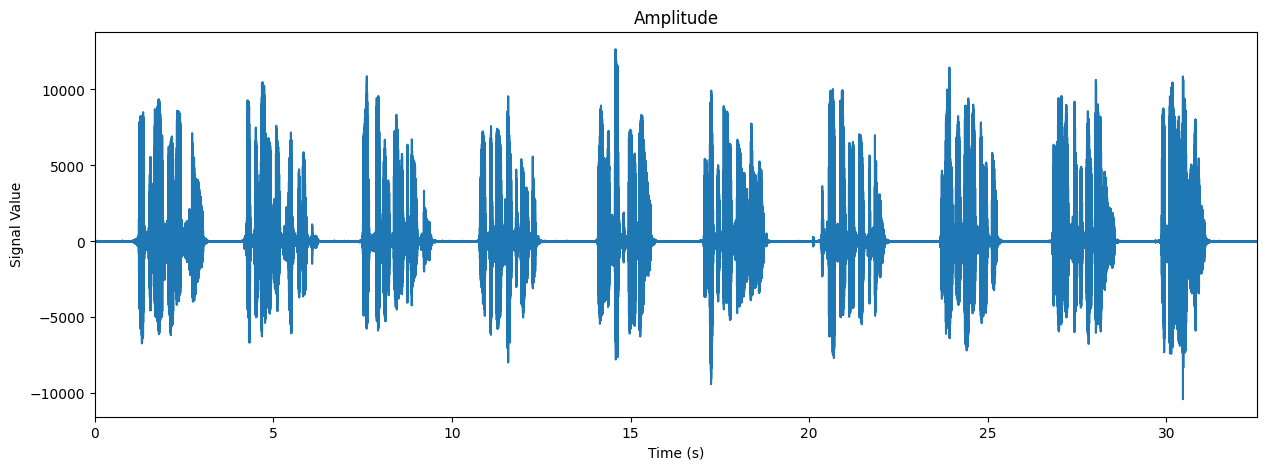

<Figure size 1500x500 with 0 Axes>

In [37]:
plt.figure(figsize=(15, 5))
plot_amplitude(harvard_denoised)

**Wykresy głośności wybranych klipów**

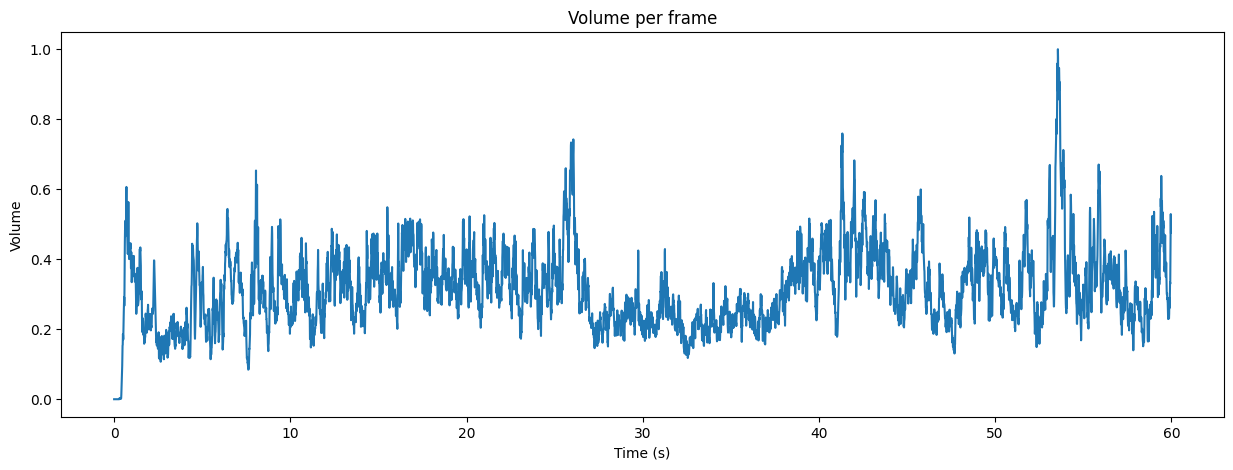

<Figure size 1500x500 with 0 Axes>

In [39]:
plt.figure(figsize=(15, 5))
plot_volume(starwars)

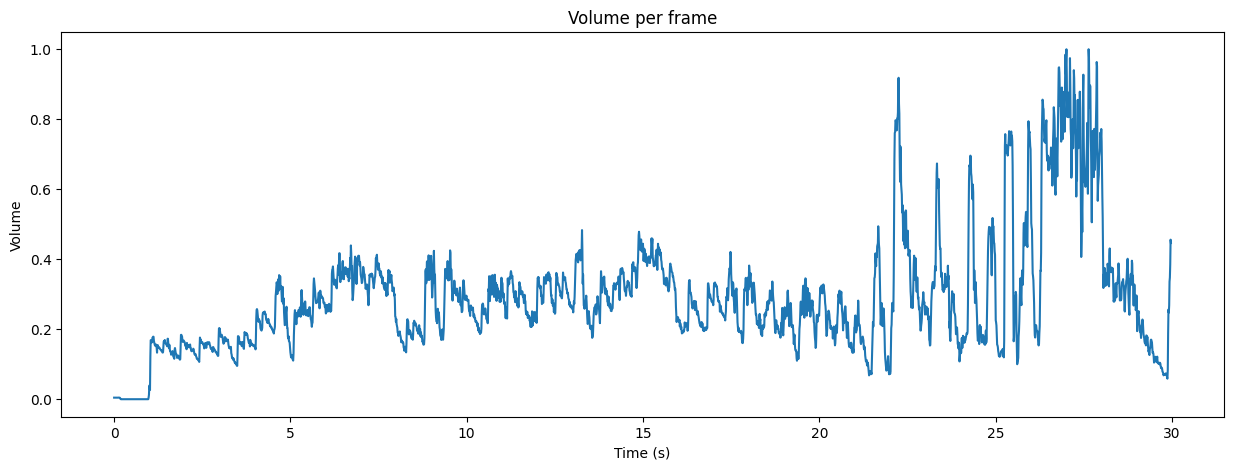

<Figure size 1500x500 with 0 Axes>

In [49]:
plt.figure(figsize=(15, 5))
plot_volume(panther)

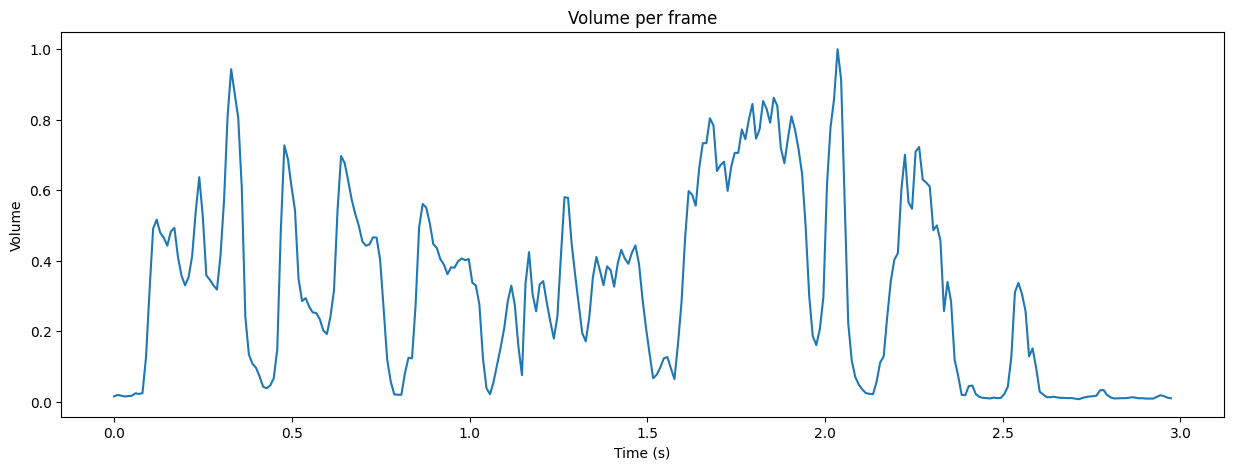

<Figure size 1500x500 with 0 Axes>

In [41]:
plt.figure(figsize=(15, 5))
plot_volume(sentence)

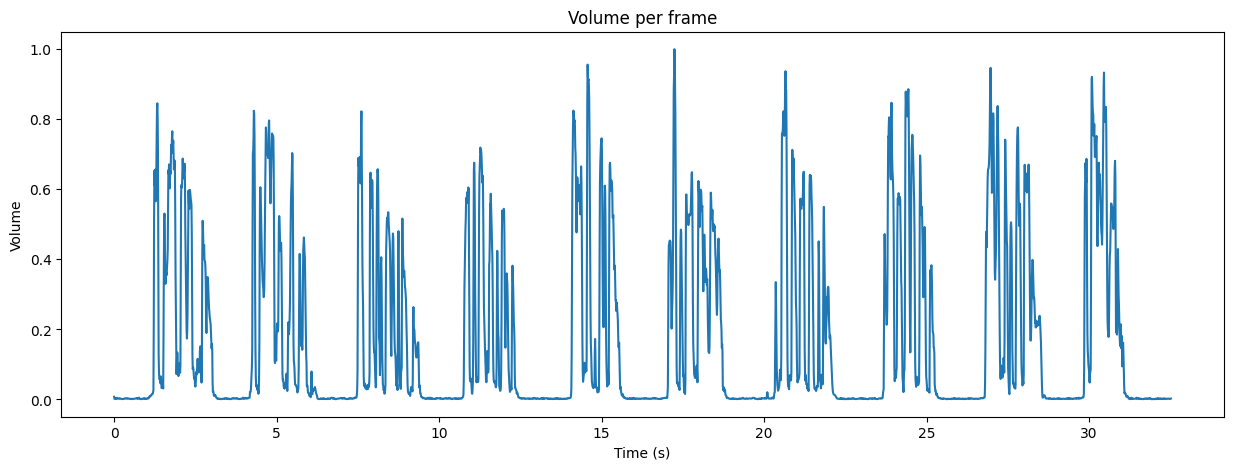

<Figure size 1500x500 with 0 Axes>

In [42]:
plt.figure(figsize=(15, 5))
plot_volume(harvard_denoised)

**Wykresy STE dla wybranych klipów**

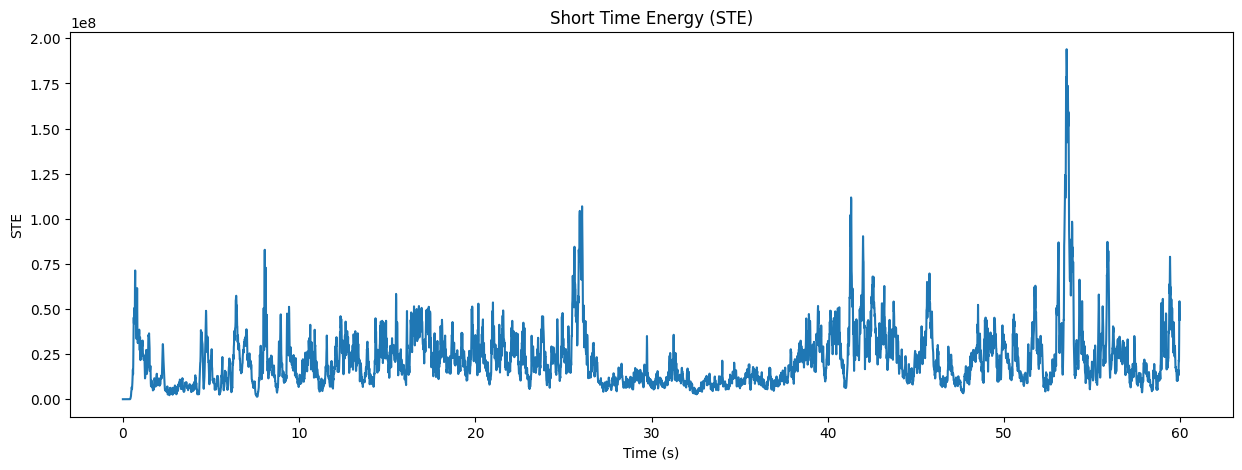

<Figure size 1500x500 with 0 Axes>

In [50]:
plt.figure(figsize=(15, 5))
plot_ste(starwars)

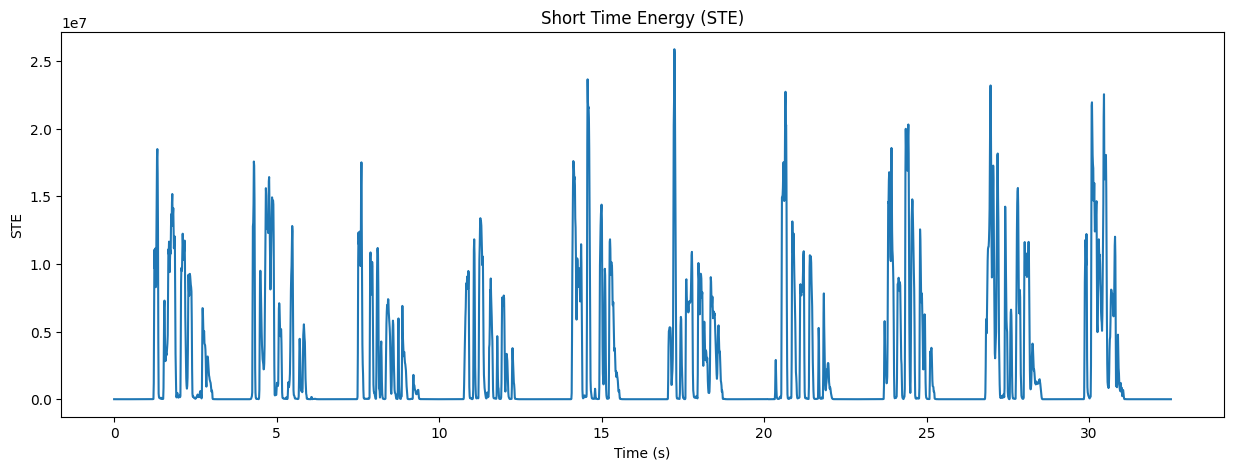

<Figure size 1500x500 with 0 Axes>

In [113]:
plt.figure(figsize=(15, 5))
plot_ste(harvard_denoised)

**Wykresy Zero Crossing Rate dla wybranych klipów**

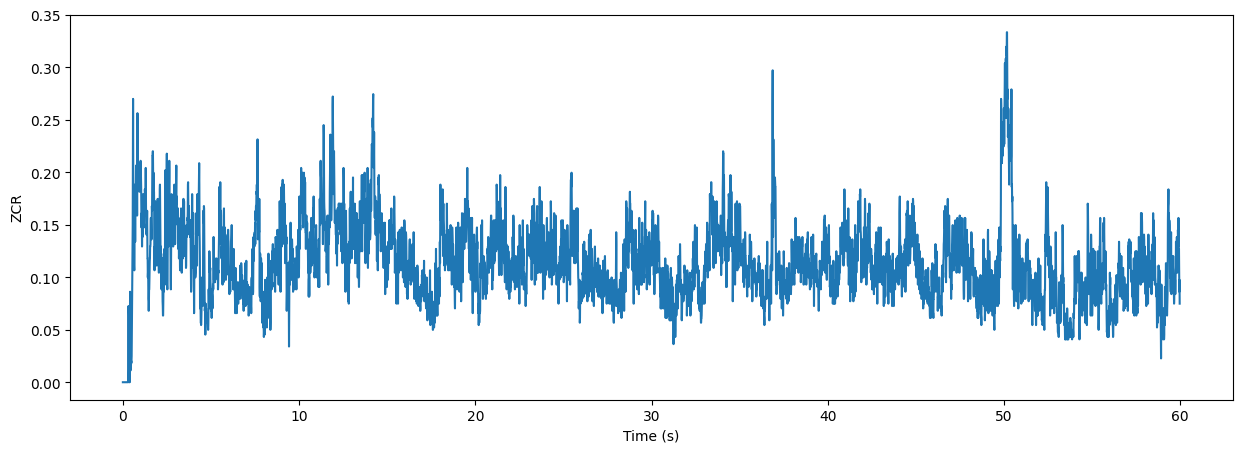

<Figure size 1500x500 with 0 Axes>

In [52]:
plt.figure(figsize=(15, 5))
plot_zcr(starwars)

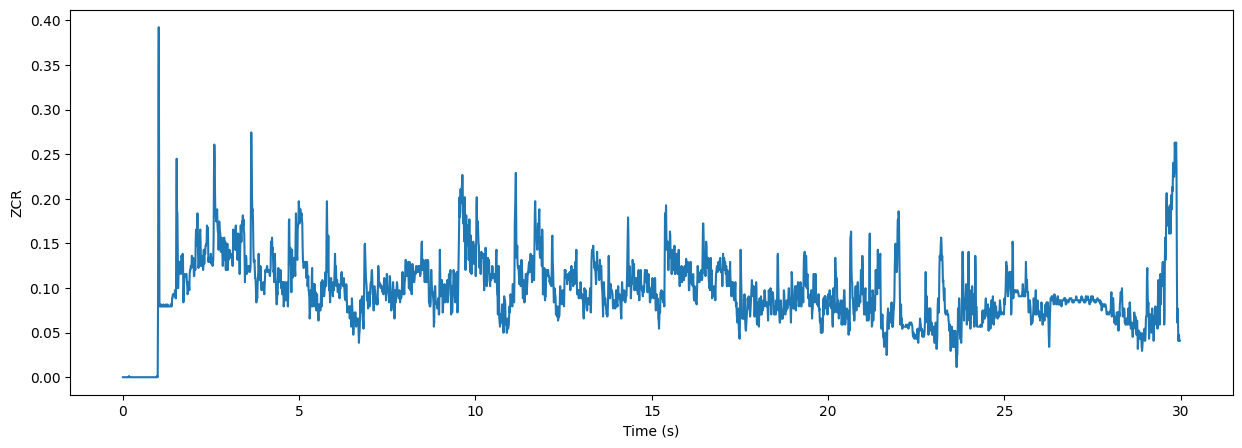

<Figure size 1500x500 with 0 Axes>

In [53]:
plt.figure(figsize=(15, 5))
plot_zcr(panther)

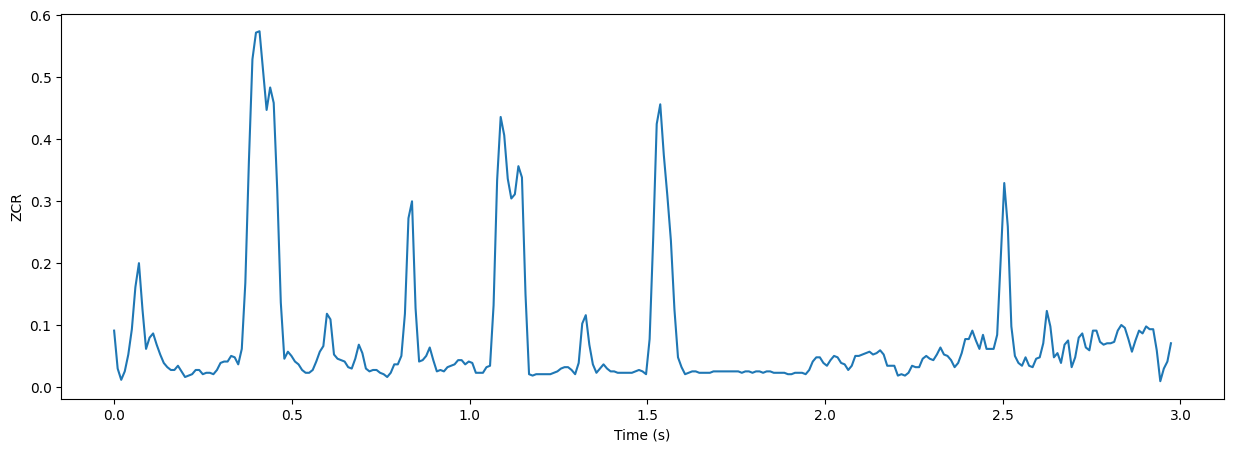

<Figure size 1500x500 with 0 Axes>

In [54]:
plt.figure(figsize=(15, 5))
plot_zcr(sentence)

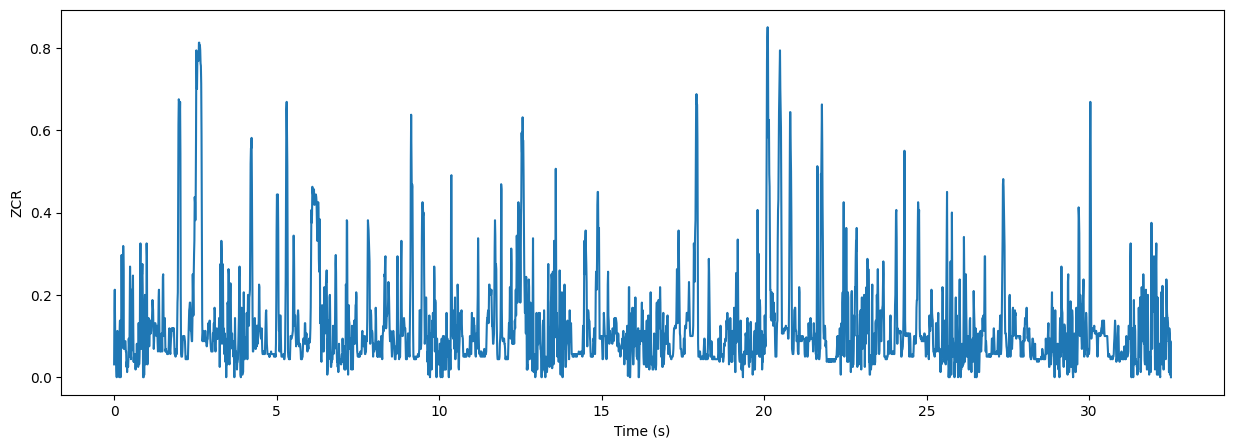

<Figure size 1500x500 with 0 Axes>

In [55]:
plt.figure(figsize=(15, 5))
plot_zcr(harvard_denoised)

### Analiza ciszy w klipach

Specjalnie do tej części został przygotowany klip `harvard_denoised`. Jest to przykładowy klip audio z mową dodatkowo odszumiony za pomocą Audacity tak aby między zdaniami była zupełana cisza.

In [56]:
harvard_denoised.calculate_sr()

0.26273032115324785

26% tego klipu to zupełna cisza, postaramy się zobaczyć to także na wykresie.

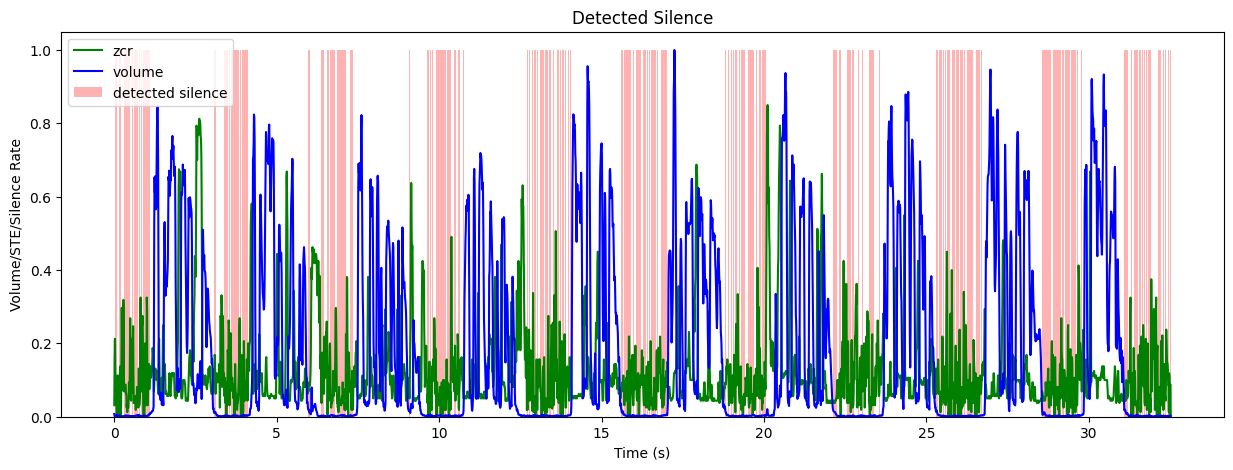

<Figure size 1500x500 with 0 Axes>

In [84]:
plt.figure(figsize=(15, 5))
plot_silence(harvard_denoised)

Widać, że tak na prawdę cisza to większa część klipu niż 26%. Taki wskaźnik jest spowodowany złym dobraniem progów (widzimy dużo "dziur w ciszy").
Zobaczymy jak zmieni się sytuacja dla zmienionego progu `zcr_threshold`.

In [77]:
harvard_denoised.calculate_sr(zcr_threshold=0.2)

0.4120717668614097

41% to dużo rozsądniejsza liczba (zmiana tego parametru na coraz wyższe nie skutkuje już aż takim wzrostem, dla wartości 0.1 silent ratio wynosi 48%)

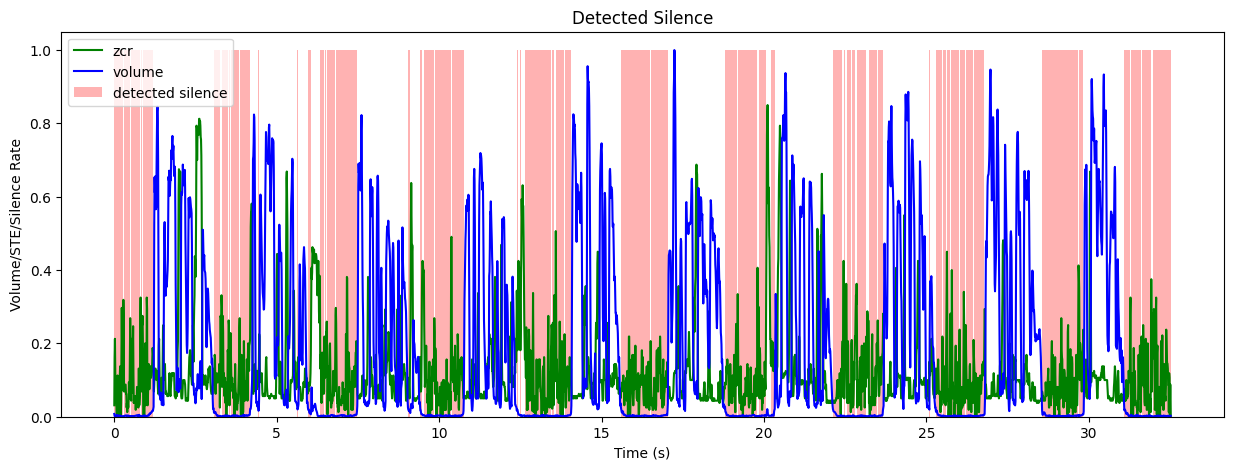

<Figure size 1500x500 with 0 Axes>

In [85]:
plt.figure(figsize=(15, 5))
plot_silence(harvard_denoised, zcr_threshold=0.2)

Większość dziur już została zapełniona i detekcja ciszy ma dużo więcej sensu.

Podobną analizę możemy przeprowadzić dla klipu `gettysburg`.

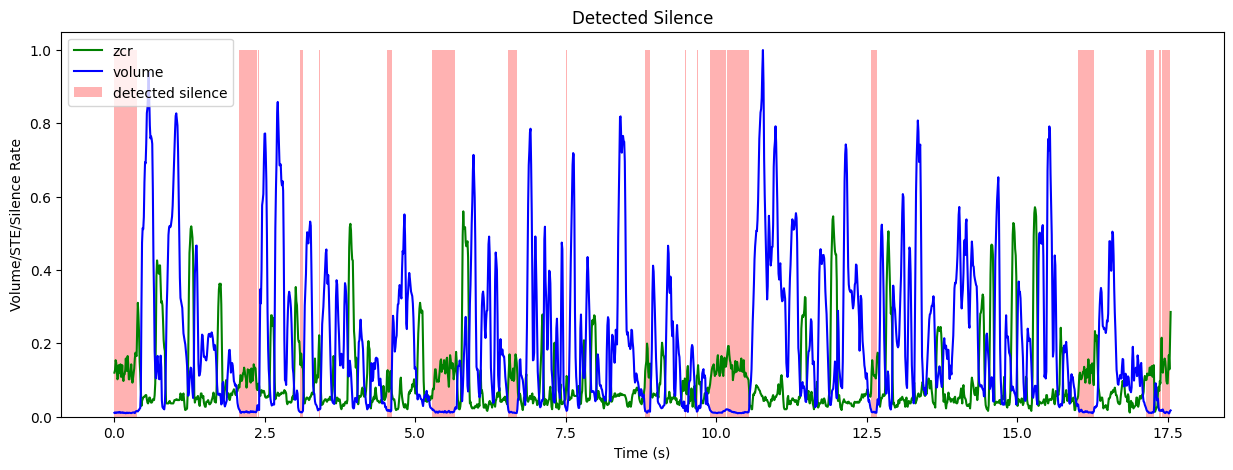

<Figure size 1500x500 with 0 Axes>

In [89]:
plt.figure(figsize=(15, 5))
plot_silence(gettysburg, zcr_threshold=0.2)

Dla klipu `starwars` widać, że cisza praktycznie nie występuje poza samym początkiem

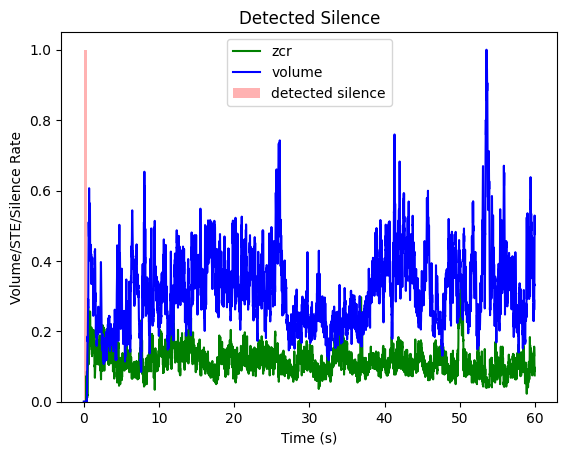

<Figure size 1500x500 with 0 Axes>

In [114]:
plt.figure(figsize=(15, 5))
plot_silence(starwars, zcr_threshold=0.2)

### Rozróżnienie muzyki od mowy

W tym celu skorzystamy ze wskaźnika LSTER. Który dla muzyki ma rozkład z dużą masą gęstości przy 0 (nieskie wartości) natomiast dla mowy ma on większą wariancję, ale także większą średnią (spodziewamy się wartości około 0.3-0.4). Na obrazku mowa to (a), muzyka to (b)

<img src="lster.png" alt="LSTER distribution for music and speech" />

In [94]:
music_clips = [africa, cantina, panther, starwars]
speech_clips = [female, male, gettysburg, sentence, harvard_denoised]

lster_music = [clip.calculate_lster() for clip in music_clips]
lster_speech = [clip.calculate_lster() for clip in speech_clips]

In [100]:
import seaborn as sns

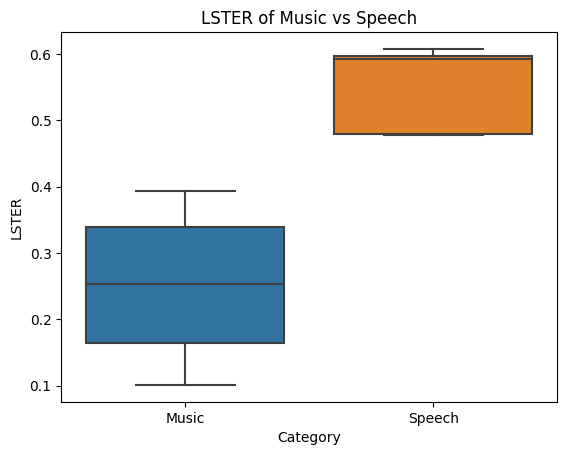

In [111]:
sns.boxplot([lster_music, lster_speech]).set_xticklabels(["Music", "Speech"])
plt.title("LSTER of Music vs Speech")
plt.xlabel("Category")
plt.ylabel("LSTER")
plt.show()

Widzimy, że ta zależność sprawdza się na naszych klipach